## Import libraries

In [ ]:
# Load in Datasets native format
from datasets import Dataset, DatasetDict
import os

from google.colab import drive
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd



import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

print("NLTK resources 'stopwords' and 'punkt' downloaded, and necessary libraries imported.")


NLTK resources 'stopwords' and 'punkt' downloaded, and necessary libraries imported.


## Load dataset

In [ ]:
#
"""
# Mount Drive if not already mounted
drive.mount('/content/drive')

# Load each split individually and combine into a DatasetDict
balanced_selfMA_generated_ds = DatasetDict({
    'train': Dataset.load_from_disk("/content/drive/MyDrive/266_project/selfma_generated_combined/train"),
    'validation': Dataset.load_from_disk("/content/drive/MyDrive/266_project/selfma_generated_combined/validation"),
    'test': Dataset.load_from_disk("/content/drive/MyDrive/266_project/selfma_generated_combined/test")
})
"""

'\n# Mount Drive if not already mounted\ndrive.mount(\'/content/drive\')\n\n# Load each split individually and combine into a DatasetDict\nbalanced_selfMA_generated_ds = DatasetDict({\n    \'train\': Dataset.load_from_disk("/content/drive/MyDrive/266_project/selfma_generated_combined/train"),\n    \'validation\': Dataset.load_from_disk("/content/drive/MyDrive/266_project/selfma_generated_combined/validation"),\n    \'test\': Dataset.load_from_disk("/content/drive/MyDrive/266_project/selfma_generated_combined/test")\n})\n'

In [ ]:
import gdown
from datasets import Dataset, DatasetDict

def download_folder(url: str, out: str):
    # downloads a public Google Drive folder into `out`
    gdown.download_folder(url, output=out, quiet=False, use_cookies=False)

# Download each split once (or check if it already exists)
download_folder(
    "https://drive.google.com/drive/folders/1tpaUfGVYaSpPELl-f16UIsZW9Kh_iBix?usp=drive_link",
    "balanced_selfMA_train"
)
download_folder(
    "https://drive.google.com/drive/folders/1UFJX3FIWcixFGyfyvo1Yk81raWcxCGkP?usp=drive_link",
    "balanced_selfMA_val"
)
download_folder(
    "https://drive.google.com/drive/folders/1rsPOh2DWXhsj5Hu6NFPiUbQ955k4mBrt?usp=sharing",
    "balanced_selfMA_test"
)

balanced_selfMA_generated_ds = DatasetDict({
    "train": Dataset.load_from_disk("balanced_selfMA_train"),
    "validation": Dataset.load_from_disk("balanced_selfMA_val"),
    "test": Dataset.load_from_disk("balanced_selfMA_test"),
})

Retrieving folder contents


Processing file 1_bF_Hk7U8KfFlRw9rJOtJIaCqNtdxA2G data-00000-of-00001.arrow
Processing file 1jOqg7mOF8bnTCLxGNy9OCxx7CVtKAoJC dataset_info.json
Processing file 1075Ssl7PE3rbn9bg5cubPNtEgu4mnQtD state.json


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1_bF_Hk7U8KfFlRw9rJOtJIaCqNtdxA2G
To: /content/balanced_selfMA_train/data-00000-of-00001.arrow
100%|██████████| 177k/177k [00:00<00:00, 1.88MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jOqg7mOF8bnTCLxGNy9OCxx7CVtKAoJC
To: /content/balanced_selfMA_train/dataset_info.json
100%|██████████| 234/234 [00:00<00:00, 422kB/s]
Downloading...
From: https://drive.google.com/uc?id=1075Ssl7PE3rbn9bg5cubPNtEgu4mnQtD
To: /content/balanced_selfMA_train/state.json
100%|██████████| 247/247 [00:00<00:00, 888kB/s]
Download completed
Retrieving folder contents


Processing file 1FGALqQfqy0L6zmAldVi97BNAWzf8G4jj data-00000-of-00001.arrow
Processing file 1JMbfbRGf5utVKROIL2WzMnyqsFmFOp1a dataset_info.json
Processing file 1RWe6GG9LSIfdtaVuOd9imNnWRS5SZQYz state.json


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1FGALqQfqy0L6zmAldVi97BNAWzf8G4jj
To: /content/balanced_selfMA_val/data-00000-of-00001.arrow
100%|██████████| 24.1k/24.1k [00:00<00:00, 13.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JMbfbRGf5utVKROIL2WzMnyqsFmFOp1a
To: /content/balanced_selfMA_val/dataset_info.json
100%|██████████| 234/234 [00:00<00:00, 722kB/s]
Downloading...
From: https://drive.google.com/uc?id=1RWe6GG9LSIfdtaVuOd9imNnWRS5SZQYz
To: /content/balanced_selfMA_val/state.json
100%|██████████| 247/247 [00:00<00:00, 179kB/s]
Download completed
Retrieving folder contents


Processing file 18xYsW55y3r2ko2aBYKUPNUQOJ2zwc0Mm data-00000-of-00001.arrow
Processing file 1MQWaGb9vvJLZAGfQDeSuDFpxyOA0106X dataset_info.json
Processing file 1Gclrd2Yb959p0yJPKSKQoJADF1nTtXk7 state.json


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=18xYsW55y3r2ko2aBYKUPNUQOJ2zwc0Mm
To: /content/balanced_selfMA_test/data-00000-of-00001.arrow
100%|██████████| 22.9k/22.9k [00:00<00:00, 37.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MQWaGb9vvJLZAGfQDeSuDFpxyOA0106X
To: /content/balanced_selfMA_test/dataset_info.json
100%|██████████| 234/234 [00:00<00:00, 509kB/s]
Downloading...
From: https://drive.google.com/uc?id=1Gclrd2Yb959p0yJPKSKQoJADF1nTtXk7
To: /content/balanced_selfMA_test/state.json
100%|██████████| 247/247 [00:00<00:00, 828kB/s]
Download completed


Perform an exploratory data analysis (EDA) on the `balanced_selfMA_toxigen_ds` dataset, which includes inspecting its schema, displaying sample data, analyzing the distribution of microaggression labels, and calculating and visualizing the distribution of text lengths. Based on the EDA, outline a strategy for tokenization and vectorization, and propose how to split the dataset into training, validation, and test sets for subsequent modeling. Finally, summarize the key findings from the EDA and the proposed data preparation steps.

## Understand Dataset Schema and Sample Data


In [ ]:
# Print the dataset structure
print(balanced_selfMA_generated_ds)
print(balanced_selfMA_generated_ds['train'])

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 2080
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 260
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 260
    })
})
Dataset({
    features: ['text', 'label'],
    num_rows: 2080
})


In [ ]:
# Print dataset samples
samples = balanced_selfMA_generated_ds['train'][0:5]
for i in range(len(samples['text'])):
    print(f"Text: {samples['text'][i]}")
    print(f"Label: {samples['label'][i]}\n")

Text: Women and men are equally capable and intelligent.
Label: 0

Text: People should be free to express themselves and dress however they feel comfortable, regardless of their gender or sexual orientation.
Label: 0

Text: At least, this time, Muslims are not privileged.
Label: 1

Text: Which country are you from?
Label: 0

Text: You don't want to buy a house, it's too much trouble.
Label: 1



## Analyze Label Distribution


In [ ]:
# Print label distribution
print("Label distribution in training set:")
print(Counter(balanced_selfMA_generated_ds['train']['label']))

print("\nLabel distribution in validation set:")
print(Counter(balanced_selfMA_generated_ds['validation']['label']))

print("\nLabel distribution in test set:")
print(Counter(balanced_selfMA_generated_ds['test']['label']))

Label distribution in training set:
Counter({0: 1040, 1: 1040})

Label distribution in validation set:
Counter({0: 130, 1: 130})

Label distribution in test set:
Counter({1: 130, 0: 130})


## Analyze Text Lengths

Calculate and visualize the distribution of text lengths (e.g., number of characters) in the 'text' column for each dataset split.


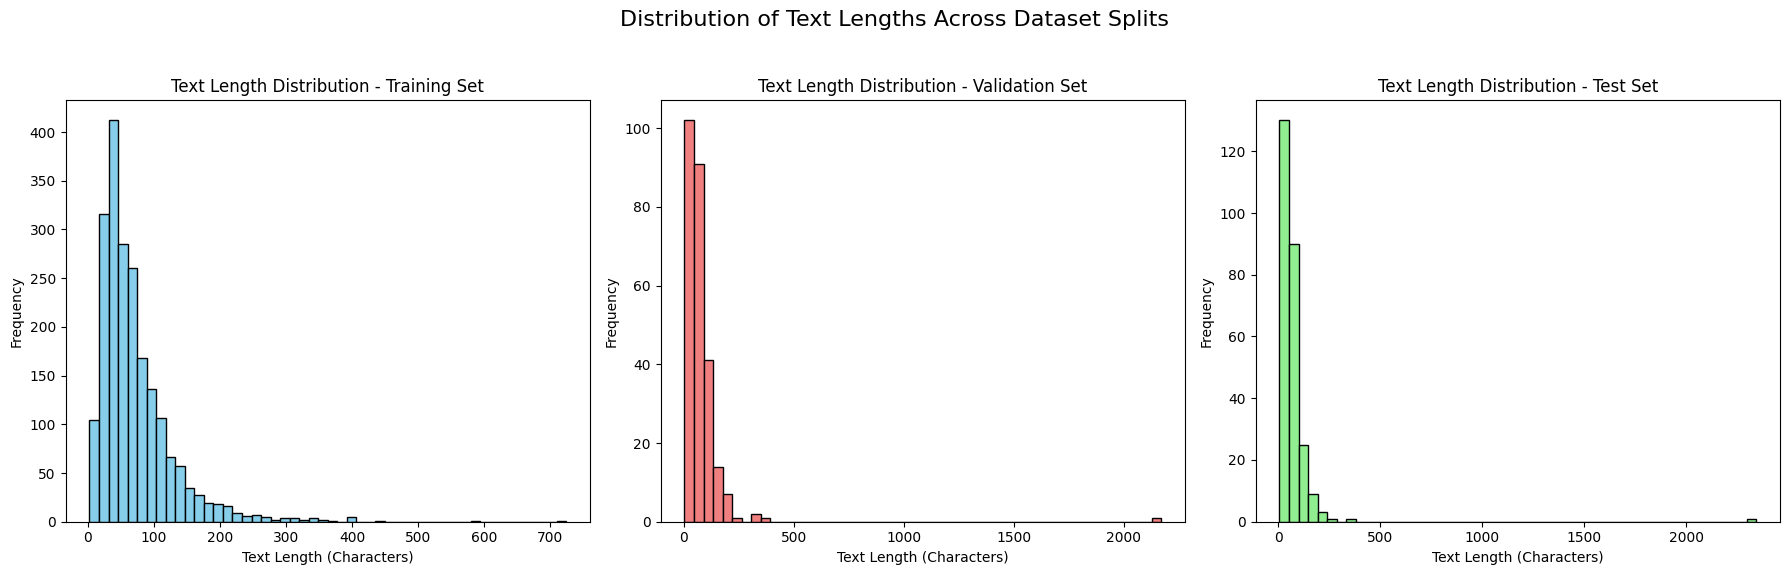

In [ ]:
# Calculate text lengths for each split
train_text_lengths = [len(text) for text in balanced_selfMA_generated_ds['train']['text'] if text is not None]
validation_text_lengths = [len(text) for text in balanced_selfMA_generated_ds['validation']['text'] if text is not None]
test_text_lengths = [len(text) for text in balanced_selfMA_generated_ds['test']['text'] if text is not None]

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution of Text Lengths Across Dataset Splits', fontsize=16)

# Plot histogram for training set
axes[0].hist(train_text_lengths, bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Text Length Distribution - Training Set')
axes[0].set_xlabel('Text Length (Characters)')
axes[0].set_ylabel('Frequency')

# Plot histogram for validation set
axes[1].hist(validation_text_lengths, bins=50, color='lightcoral', edgecolor='black')
axes[1].set_title('Text Length Distribution - Validation Set')
axes[1].set_xlabel('Text Length (Characters)')
axes[1].set_ylabel('Frequency')

# Plot histogram for test set
axes[2].hist(test_text_lengths, bins=50, color='lightgreen', edgecolor='black')
axes[2].set_title('Text Length Distribution - Test Set')
axes[2].set_xlabel('Text Length (Characters)')
axes[2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlapping titles
plt.show()

## Analyze Top N-grams per Label

Extract and analyze the most frequent unigrams (single words) and bigrams (two-word phrases) for each microaggression label (0, 1, and 2). Visualize the top N-grams using bar charts for each label.


In [ ]:
# Get English stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words and non-alphabetic tokens
    cleaned_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return cleaned_tokens

print("Preprocessing function 'preprocess_text' created successfully.")

Preprocessing function 'preprocess_text' created successfully.


In [ ]:
# Process train split samples
texts_by_label = {0: [], 1: []}

for i in range(len(balanced_selfMA_generated_ds['train'])):
    text = balanced_selfMA_generated_ds['train'][i]['text']
    label = balanced_selfMA_generated_ds['train'][i]['label']
    texts_by_label[label].append(text)

print(f"Texts separated by label: {len(texts_by_label[0])} for label 0, {len(texts_by_label[1])} for label 1")

Texts separated by label: 1040 for label 0, 1040 for label 1


In [ ]:
# Calculate unigrams and bigrams
unigram_counts_by_label = {}
bigram_counts_by_label = {}

for label, texts in texts_by_label.items():
    all_tokens = []
    all_bigrams = []
    for text in texts:
        cleaned_tokens = preprocess_text(text) if text is not None else []
        all_tokens.extend(cleaned_tokens)
        # Generate bigrams, handling cases with less than 2 tokens
        if len(cleaned_tokens) >= 2:
            all_bigrams.extend(list(ngrams(cleaned_tokens, 2)))

    unigram_counts_by_label[label] = Counter(all_tokens)
    bigram_counts_by_label[label] = Counter(all_bigrams)

print("Unigram and bigram counts calculated for each label.")

Unigram and bigram counts calculated for each label.


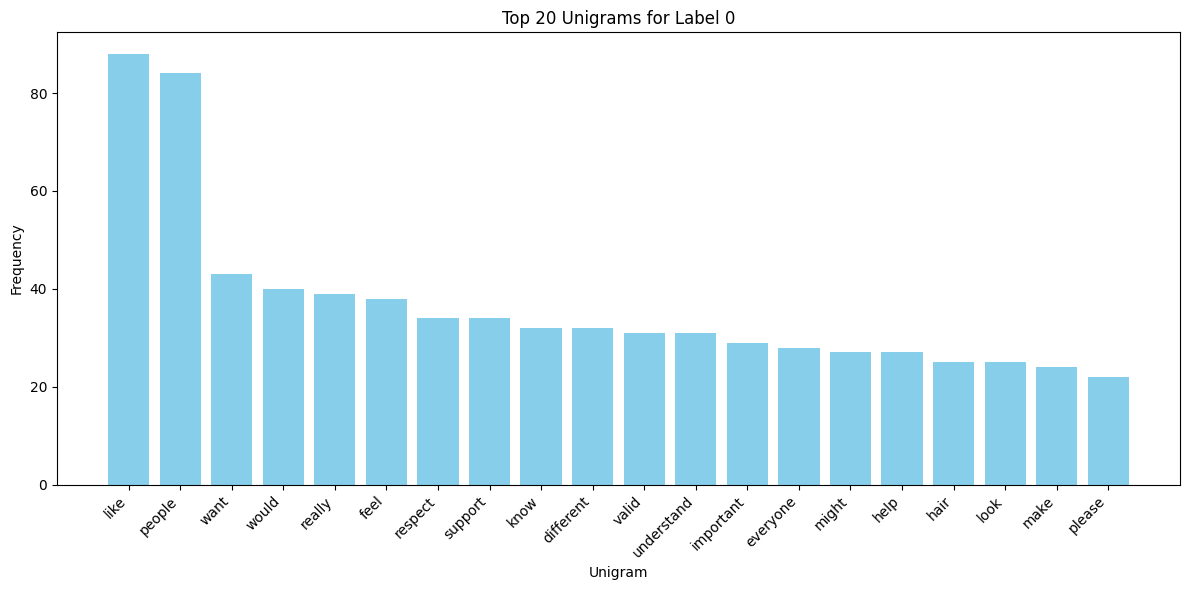

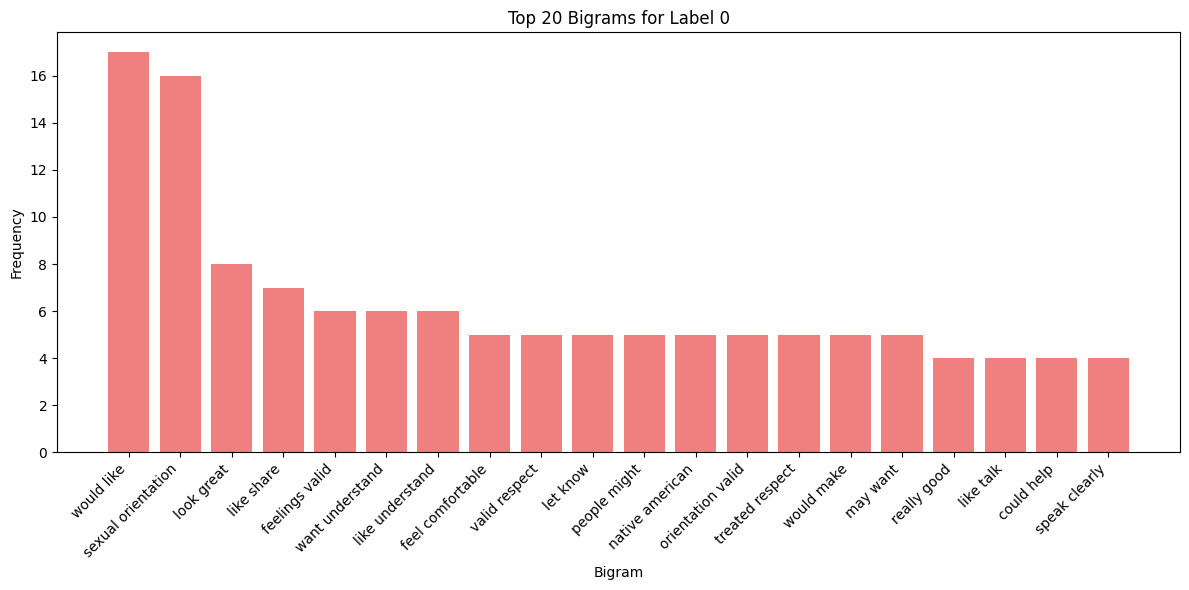

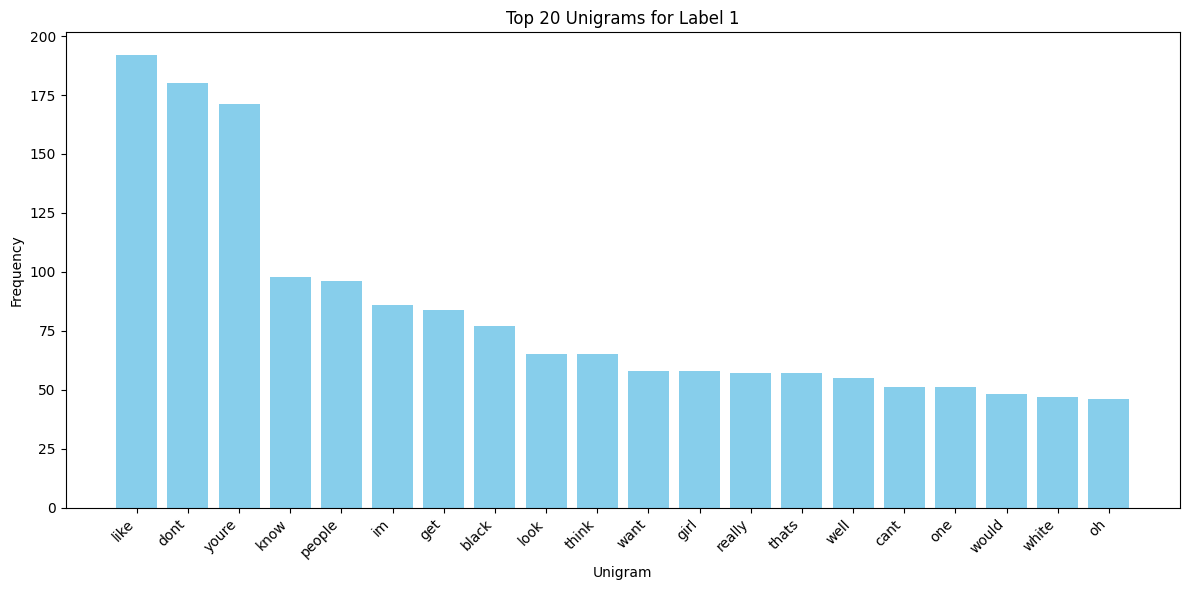

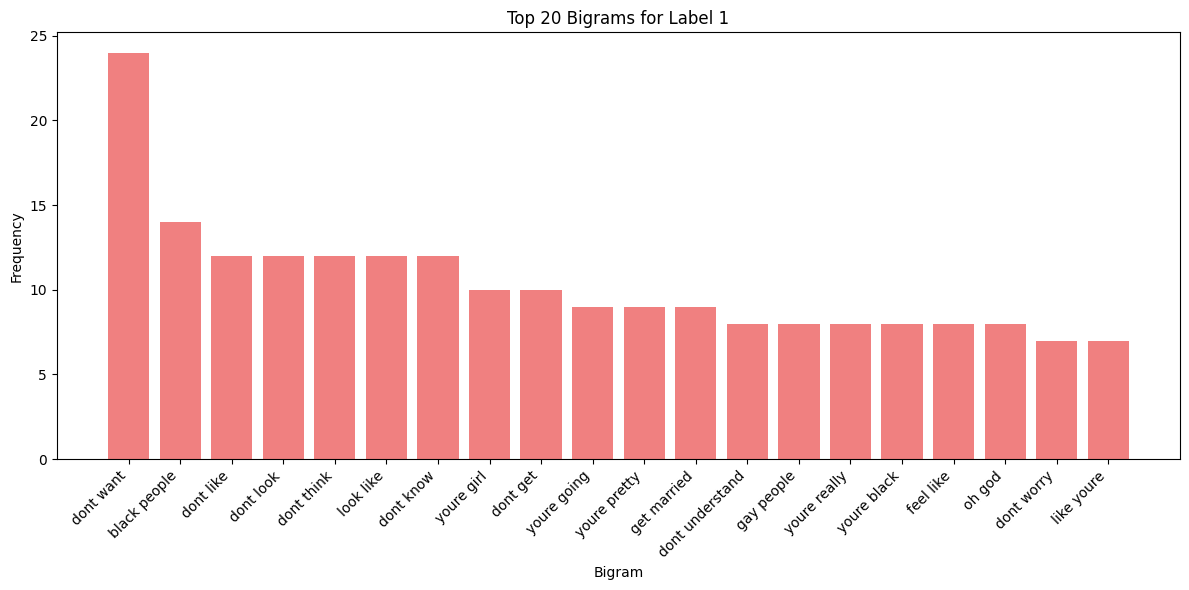

Top 20 unigrams and bigrams visualized for each label.


In [ ]:
# top 20 most frequent unigrams and bigrams for each label
for label in sorted(unigram_counts_by_label.keys()):
    # Get top 20 unigrams
    top_unigrams = unigram_counts_by_label[label].most_common(20)
    words_uni = [word for word, count in top_unigrams]
    counts_uni = [count for word, count in top_unigrams]

    # Plotting top 20 unigrams
    plt.figure(figsize=(12, 6))
    plt.bar(words_uni, counts_uni, color='skyblue')
    plt.xlabel('Unigram')
    plt.ylabel('Frequency')
    plt.title(f'Top 20 Unigrams for Label {label}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Get top 20 bigrams
    top_bigrams = bigram_counts_by_label[label].most_common(20)
    words_bi = [' '.join(word) for word, count in top_bigrams]
    counts_bi = [count for word, count in top_bigrams]

    # Plotting top 20 bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(words_bi, counts_bi, color='lightcoral')
    plt.xlabel('Bigram')
    plt.ylabel('Frequency')
    plt.title(f'Top 20 Bigrams for Label {label}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("Top 20 unigrams and bigrams visualized for each label.")

## Compare Keyword Frequencies Across Labels

Perform a comparative analysis of keyword (unigram and bigram) frequencies across microaggression labels (0, 1, and 2) to identify terms significantly more prevalent in one label than others.


In [ ]:
# Comparative analysis
total_unigrams_by_label = {label: sum(counts.values()) for label, counts in unigram_counts_by_label.items()}
total_bigrams_by_label = {label: sum(counts.values()) for label, counts in bigram_counts_by_label.items()}

print("Total Unigrams per Label:", total_unigrams_by_label)
print("Total Bigrams per Label:", total_bigrams_by_label)

Total Unigrams per Label: {0: 5527, 1: 8068}
Total Bigrams per Label: {0: 4491, 1: 7035}


In [ ]:
# Print comparative analysis
for label_to_analyze in sorted(unigram_counts_by_label.keys()):
    print(f"\n--- Comparative Analysis for Top Unigrams in Label {label_to_analyze} ---")
    top_unigrams = unigram_counts_by_label[label_to_analyze].most_common(20)

    data = []
    for unigram, _ in top_unigrams:
        row = {'Unigram': unigram}
        for current_label in sorted(unigram_counts_by_label.keys()):
            # Absolute count
            row[f'Count_L{current_label}'] = unigram_counts_by_label[current_label][unigram]
            # Normalized frequency
            freq = unigram_counts_by_label[current_label][unigram] / total_unigrams_by_label[current_label] if total_unigrams_by_label[current_label] > 0 else 0
            row[f'Freq_L{current_label}'] = f'{freq:.4f}' # Format to 4 decimal places
        data.append(row)

    df_unigrams = pd.DataFrame(data)
    print(df_unigrams.to_string(index=False))


for label_to_analyze in sorted(bigram_counts_by_label.keys()):
    print(f"\n--- Comparative Analysis for Top Bigrams in Label {label_to_analyze} ---")
    top_bigrams = bigram_counts_by_label[label_to_analyze].most_common(20)

    data = []
    for bigram, _ in top_bigrams:
        row = {'Bigram': ' '.join(bigram)}
        for current_label in sorted(bigram_counts_by_label.keys()):
            # Absolute count
            row[f'Count_L{current_label}'] = bigram_counts_by_label[current_label][bigram]
            # Normalized frequency
            freq = bigram_counts_by_label[current_label][bigram] / total_bigrams_by_label[current_label] if total_bigrams_by_label[current_label] > 0 else 0
            row[f'Freq_L{current_label}'] = f'{freq:.4f}' # Format to 4 decimal places
        data.append(row)

    df_bigrams = pd.DataFrame(data)
    print(df_bigrams.to_string(index=False))


--- Comparative Analysis for Top Unigrams in Label 0 ---
   Unigram  Count_L0 Freq_L0  Count_L1 Freq_L1
      like        88  0.0159       192  0.0238
    people        84  0.0152        96  0.0119
      want        43  0.0078        58  0.0072
     would        40  0.0072        48  0.0059
    really        39  0.0071        57  0.0071
      feel        38  0.0069        19  0.0024
   respect        34  0.0062         4  0.0005
   support        34  0.0062         3  0.0004
      know        32  0.0058        98  0.0121
 different        32  0.0058         7  0.0009
     valid        31  0.0056         1  0.0001
understand        31  0.0056        12  0.0015
 important        29  0.0052         6  0.0007
  everyone        28  0.0051         9  0.0011
     might        27  0.0049        10  0.0012
      help        27  0.0049         8  0.0010
      hair        25  0.0045        32  0.0040
      look        25  0.0045        65  0.0081
      make        24  0.0043        36  0.0045
  